# Socrata API Project

This notebook uses the `requests` package and the SODA API to access data through https://data.nashville.gov/. It begins with [Top 500 Monthly Searches](https://data.nashville.gov/Public-Services/Nashville-gov-Top-500-Monthly-Searches/fuaa-r5cm), then pulls in different datasets further on.

In [1]:
import requests
import pandas as pd
from time import strptime
import matplotlib.pyplot as plt
import seaborn as sns
import string

%matplotlib inline

### Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

##### Establish the endpoint url

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

##### Read in the webpage's html and check the response code

In [3]:
params1 = {
    'year':'2016',
    'query_text':'fire',
    '$limit':100000
}

response = requests.get(endpoint, params=params1)
response.status_code

200

##### Convert the html to a JSON (essentially a dictionary of dictionaries)

In [4]:
result = response.json()
result[0:3]

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'}]

##### Explore the result (e.g what keys are available for each entry?)

In [5]:
result[0].keys()

dict_keys(['month_name', 'year', 'query_count', 'query_text'])

In [6]:
print(type(result[0]['year']))

<class 'str'>


In [7]:
result[0]['query_text']

'fire'

In [8]:
len(result)

12

In [9]:
for item in result:
    print(item)

{'month_name': 'January', 'year': '2016', 'query_count': '19', 'query_text': 'fire'}
{'month_name': 'February', 'year': '2016', 'query_count': '35', 'query_text': 'fire'}
{'month_name': 'March', 'year': '2016', 'query_count': '32', 'query_text': 'fire'}
{'month_name': 'April', 'year': '2016', 'query_count': '26', 'query_text': 'fire'}
{'month_name': 'May', 'year': '2016', 'query_count': '24', 'query_text': 'fire'}
{'month_name': 'June', 'year': '2016', 'query_count': '31', 'query_text': 'fire'}
{'month_name': 'July', 'year': '2016', 'query_count': '24', 'query_text': 'fire'}
{'month_name': 'August', 'year': '2016', 'query_count': '47', 'query_text': 'fire'}
{'month_name': 'September', 'year': '2016', 'query_count': '36', 'query_text': 'fire'}
{'month_name': 'October', 'year': '2016', 'query_count': '38', 'query_text': 'fire'}
{'month_name': 'November', 'year': '2016', 'query_count': '32', 'query_text': 'fire'}
{'month_name': 'December', 'year': '2016', 'query_count': '38', 'query_text'

##### Find the month with the most searches of "fire"

In [10]:
# Find the max number of searches
max(item.get('query_count') for item in result)

'47'

In [11]:
# Find the month(s) with the max number of searches
max_months = [item.get('month_name') for item in result if item.get('query_count') == max(item.get('query_count') for item in result)]

print('The month(s) with the highest number of searches for "fire":')
for mo in max_months:
    print (mo)

The month(s) with the highest number of searches for "fire":
August


#### Answer: The month(s) with the highest number of searches for "fire": August.
<hr>

### Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [12]:
params2 = {
    '$limit':100000,
    '$where':'query_count > 100'
}

response = requests.get(endpoint, params=params2)
response.status_code

200

In [13]:
result = response.json()
result[0:3]

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'}]

In [14]:
print('The number of times a query was run more than 100 times in a single month is', str(len(result)) + '.')

The number of times a query was run more than 100 times in a single month is 1262.


#### Answer: The number of times a query was run more than 100 times in a single month is 1262.
<hr>

### Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur? 

In [15]:
params3 = {
    '$limit':100000,
    'query_text':'codes',
    '$where':'query_count > 100'
}

response = requests.get(endpoint, params=params3)
response.status_code

200

In [16]:
result = response.json()
result[0:3]

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'}]

In [17]:
print('The number of times the query, "codes", was run more than 100 times in a single month is', str(len(result)) + '.')

The number of times the query, "codes", was run more than 100 times in a single month is 56.


#### Answer: The number of times the query, "codes", was run more than 100 times in a single month is 56.
<hr>

### Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

##### Pull in the API data

In [18]:
params4 = {
    '$limit':100000,
    'query_text':'maps'
}

In [19]:
response = requests.get(endpoint, params=params4)
response.status_code

200

In [20]:
result = response.json()
result[0:3]

[{'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'February',
  'year': '2014',
  'query_count': '140',
  'query_text': 'maps'},
 {'month_name': 'March',
  'year': '2014',
  'query_count': '144',
  'query_text': 'maps'}]

##### Explore the result

In [21]:
len(result)

82

In [22]:
type(strptime(result[0].get('month_name'), '%B').tm_mon)

int

In [23]:
type(result[0].get('year'))

str

In [24]:
type(result[0].get('query_count'))

str

##### Extract (and format) the dates and counts

In [25]:
date_list = ([item.get('year') + '-' + str(strptime(item.get('month_name'), '%B').tm_mon)
               if strptime(item['month_name'], '%B').tm_mon > 9 
               else item.get('year') + '-0' + str(strptime(item.get('month_name'), '%B').tm_mon)
               for item in result])

count_list = [int(item.get('query_count')) for item in result]

In [26]:
query_df = pd.DataFrame(zip(date_list, count_list), columns=['date', 'queries'])
query_df = query_df.sort_values(by='date').reset_index(drop=True)

##### Plot the result!

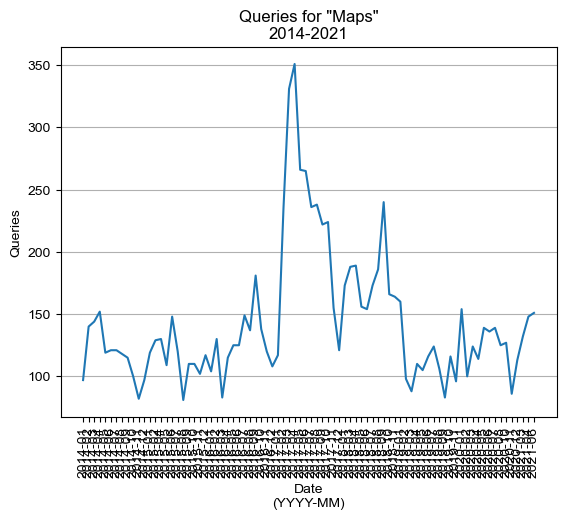

In [27]:
fig = sns.lineplot(x='date', y='queries', data=query_df)
sns.set(rc={'figure.figsize':(15,10)})
fig.set(title='Queries for "Maps"\n2014-2021', xlabel='Date\n(YYYY-MM)', ylabel='Queries')
plt.xticks(rotation=90)
plt.grid(which='major', axis='y')

<hr>

### Make an API request to pull back all the data from [hubNashville (311) Service Requests](https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh) (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)  

##### Answer: You can pull in ALOT of rows (300k took ~8sec to pull in.)

In [28]:
endpoint311 = 'https://data.nashville.gov/resource/7qhx-rexh.json'

params311 = {
    '$limit':100000
}
response311 = requests.get(endpoint311, params=params311)
response311.status_code

200

In [29]:
result311 = response311.json()
len(result311)

100000

In [30]:
result311[0]

{'case_number': '966190',
 'status': 'Closed',
 'case_request': 'Resolved by hubNashville on First Call',
 'case_subrequest': 'Resolved by hubNashville on First Call',
 'additional_subrequest': 'Resolved by hubNashville on First Call',
 'date_time_opened': '2022-05-04T17:54:30.000',
 'date_time_closed': '2022-05-04T17:54:30.000',
 'case_origin': 'Phone',
 'state_issue': 'False',
 'closed_when_created': 'True',
 'incident_address': '1301 Pilgrim Dr',
 'incident_city': 'MADISON',
 'incident_council_district': '8',
 'incident_zip_code': '37115',
 'latitude': '36.2718801',
 'longitude': '-86.7175492',
 'mapped_location': {'latitude': '36.2718801', 'longitude': '-86.7175492'},
 ':@computed_region_wvby_4s8j': '1',
 ':@computed_region_3aw5_2wv7': '1',
 ':@computed_region_p6sk_2acq': '3',
 ':@computed_region_gxvr_9jxz': '12',
 ':@computed_region_yf9r_ed6g': '3',
 ':@computed_region_fvtq_wnma': '26',
 ':@computed_region_s8bq_67w7': '3',
 ':@computed_region_v67z_xm3t': '2',
 ':@computed_region_k

In [31]:
result311[0].keys()

dict_keys(['case_number', 'status', 'case_request', 'case_subrequest', 'additional_subrequest', 'date_time_opened', 'date_time_closed', 'case_origin', 'state_issue', 'closed_when_created', 'incident_address', 'incident_city', 'incident_council_district', 'incident_zip_code', 'latitude', 'longitude', 'mapped_location', ':@computed_region_wvby_4s8j', ':@computed_region_3aw5_2wv7', ':@computed_region_p6sk_2acq', ':@computed_region_gxvr_9jxz', ':@computed_region_yf9r_ed6g', ':@computed_region_fvtq_wnma', ':@computed_region_s8bq_67w7', ':@computed_region_v67z_xm3t', ':@computed_region_kh5x_g7w5', ':@computed_region_cfa7_hbpz', ':@computed_region_sjpq_96s8', ':@computed_region_gisn_y5cm', ':@computed_region_b9k3_hpc2'])

In [32]:
city_list = ['NO CITY' if item.get('incident_city') is None else item.get('incident_city').upper() for item in result311]
city_set = set(city_list)
print(city_set)

{'HERMITAGE', 'JOELTON', 'GOODLETTSVILLE', 'LA VERGNE', 'NASHVILLE', 'WHITES CREEK', 'ASHLAND CITY', 'PEGRAM', 'FRANKLIN', 'BRENTWOOD', 'NOLENSVILLE', 'MADISON', 'ANTIOCH', 'OLD HICKORY', 'MOUNT JULIET', 'NO CITY', 'LAVERGNE'}


<hr>